In [1]:
%load_ext autoreload
%autoreload 2


from setup_func import *
sns.set(font='Cambria Math', style='white')

from kkplot import performance_comp, plot_sig_predictive, plot_sig_improvement, plot_sig_improvement2, plot_r2_adj, plot_posterior_predictive, generate_param_estimates_df, plot_from_df

## Load master dataframes

In [2]:
alcohol_master_df = pd.read_csv(f'{data_dir}/glm_master_csvs/sudonly_addictive_alcohol_master_df.csv', index_col=0)
cannabis_master_df = pd.read_csv(f'{data_dir}/glm_master_csvs/sudonly_addictive_cannabis_master_df.csv', index_col=0)

In [4]:
alcohol_master_df['DEMO_race_old'] = alcohol_master_df['DEMO_race'].copy()
# Create a new column 'DEMO_race_new' that has only 2 categories: White and Non-White
DEMO_race_new = []
for i in alcohol_master_df['DEMO_race']:
    if i == 'White':
        DEMO_race_new.append('White')
    else:
        DEMO_race_new.append('NonWhite')
alcohol_master_df['DEMO_race'] = DEMO_race_new

cannabis_master_df['DEMO_race_old'] = cannabis_master_df['DEMO_race'].copy()
# Create a new column 'DEMO_race_new' that has only 2 categories: White and Non-White
DEMO_race_new = []
for i in cannabis_master_df['DEMO_race']:
    if i == 'White':
        DEMO_race_new.append('White')
    else:
        DEMO_race_new.append('NonWhite')
cannabis_master_df['DEMO_race'] = DEMO_race_new

## Group vs. group parameter comparison

alpha
0.7362311077517446 0.8010837645939353
0.06802915301800137 0.08371623866719147
-4.897365826169647 2.8311553787687703e-06
beta
3.9147495690261422 3.7633187412307687
1.6715923537719262 1.6686181902175112
0.5206140170252865 0.6035212587614953
mod
0.20880751204697937 -1.0085163379213333
0.7975417456976241 1.4428322915044434
6.045751440479184 1.4728979462840326e-08
craving_baseline
17.81124136257274 18.3038184253833
12.962984427148214 12.965830393147847
-0.21816267808484954 0.8276444522303542
ev_weight
0.1746185940573564 0.150178042695265
0.46610483949533066 0.5885318790847797
0.26529248749957857 0.7912043673320723
rpe_weight
0.7100430378661354 -0.03540091983302748
1.270620932499625 1.72491668054108
2.8384417891496847 0.005262074121268834


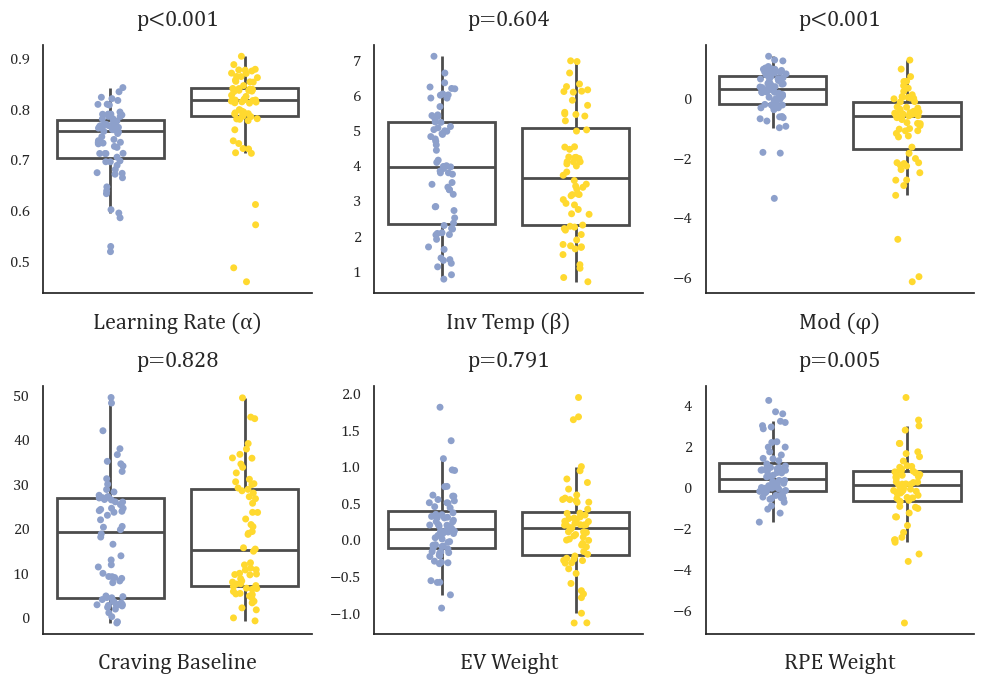

In [5]:
param_names = ['alpha', 'beta', 'mod', 'craving_baseline', 'ev_weight', 'rpe_weight']
fig, ax = plt.subplots(2, int(len(param_names)/2), figsize=(10, 7))
ax = ax.flatten()

myboxplotprops = {
    'medianprops': dict(linewidth=2),
    'whiskerprops': dict(linewidth=2),
    'capprops': dict(linewidth=0),
    'boxprops': dict(fill=0, linewidth=2),
    'fliersize': 0,
    # 'gap': 0.35,
    # 'legend': False
}

label_dict = {
    'alpha': 'Learning Rate (α)',
    'beta': 'Inv Temp (β)',
    'mod': 'Mod (φ)',
    'craving_baseline': 'Craving Baseline',
    'ev_weight': 'EV Weight',
    'rpe_weight': 'RPE Weight'
}

for i, param in enumerate(param_names):
    sns.boxplot(data=pd.concat([alcohol_master_df, cannabis_master_df]), x='Group', y=param, ax=ax[i], **myboxplotprops)
    # sns.stripplot(data=alcohol_master_df, x='Group', y=param, ax=ax[i])
    sns.stripplot(data=pd.concat([alcohol_master_df, cannabis_master_df], axis=0), x='Group', y=param, hue='Group', palette=[sns.color_palette('Set2')[2], sns.color_palette('Set2')[5]], ax=ax[i], legend=False)
    # annotate with p-values
    t, p = stats.ttest_ind(alcohol_master_df[param], cannabis_master_df[param])
    print(param)
    print(alcohol_master_df[param].mean(), cannabis_master_df[param].mean())
    print(alcohol_master_df[param].std(), cannabis_master_df[param].std())
    print(t, p)
    if p < 0.001:
        ax[i].text(0.5, 1.1, f"p<0.001", ha='center', va='center', transform=ax[i].transAxes, fontsize=16)
    else:
        ax[i].text(0.5, 1.1, f"p={p:.3f}", ha='center', va='center', transform=ax[i].transAxes, fontsize=16)
    # ax[i].set_title(param)
    # ax[i].set_ylabel('')
    ax[i].set_xlabel(label_dict[param], fontsize=16)
    ax[i].set_xticklabels([])
    ax[i].set_ylabel('')

sns.despine()
plt.tight_layout()
plt.show()

alpha
0.7362311077517446 0.8010837645939353
0.06802915301800137 0.08371623866719147
-4.897365826169647 2.8311553787687703e-06
beta
3.9147495690261422 3.7633187412307687
1.6715923537719262 1.6686181902175112
0.5206140170252865 0.6035212587614953
mod
0.20880751204697937 -1.0085163379213333
0.7975417456976241 1.4428322915044434
6.045751440479184 1.4728979462840326e-08
craving_baseline
17.81124136257274 18.3038184253833
12.962984427148214 12.965830393147847
-0.21816267808484954 0.8276444522303542
ev_weight
0.1746185940573564 0.150178042695265
0.46610483949533066 0.5885318790847797
0.26529248749957857 0.7912043673320723
rpe_weight
0.7100430378661354 -0.03540091983302748
1.270620932499625 1.72491668054108
2.8384417891496847 0.005262074121268834


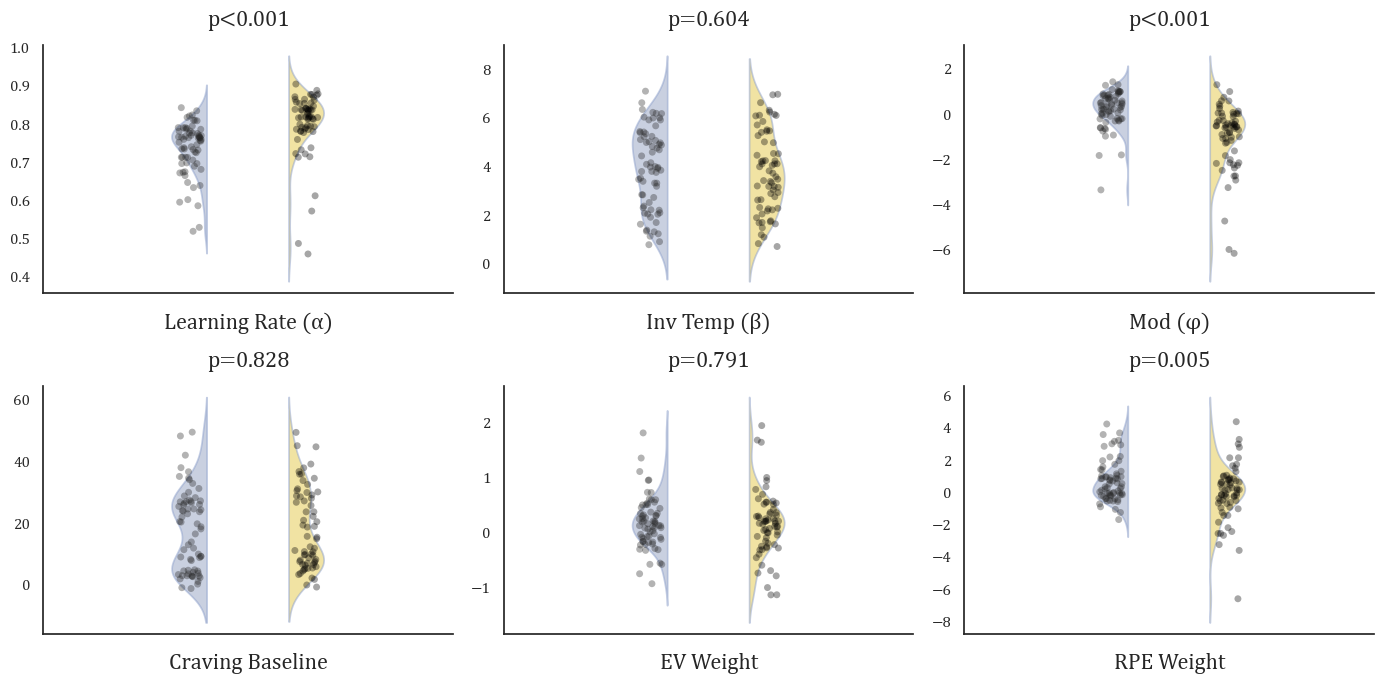

In [13]:
param_names = ['alpha', 'beta', 'mod', 'craving_baseline', 'ev_weight', 'rpe_weight']
fig, ax = plt.subplots(2, int(len(param_names)/2), figsize=(14, 7))
ax = ax.flatten()

myboxplotprops = {
    'medianprops': dict(linewidth=2),
    'whiskerprops': dict(linewidth=2),
    'capprops': dict(linewidth=0),
    'boxprops': dict(fill=0, linewidth=2),
    'fliersize': 0,
    # 'gap': 0.35,
    # 'legend': False
}

myviolinplotprops = {
    # 'medianprops': dict(linewidth=2),
    # 'whiskerprops': dict(linewidth=2),
    # 'capprops': dict(linewidth=0),
    # 'boxprops': dict(fill=0, linewidth=2),
    # 'fliersize': 0,
    'width': 1,
    'gap': 0.7,
    'legend': False
}

label_dict = {
    'alpha': 'Learning Rate (α)',
    'beta': 'Inv Temp (β)',
    'mod': 'Mod (φ)',
    'craving_baseline': 'Craving Baseline',
    'ev_weight': 'EV Weight',
    'rpe_weight': 'RPE Weight'
}

for i, param in enumerate(param_names):
    sns.violinplot(data=pd.concat([alcohol_master_df, cannabis_master_df]), x='Group', hue='Group', split=True, y=param, ax=ax[i], palette=[sns.color_palette('Set2')[2], sns.color_palette('Set2')[5]], alpha=0.5, inner=None, edgecolor=[sns.color_palette('Set2')[2], sns.color_palette('Set2')[5]], **myviolinplotprops)
    #set xlim between -2 and 3
    
    # ax[i].legend_.remove()
    # ax[i].set_xlim(-1, 2)
    sns.stripplot(data=pd.concat([alcohol_master_df, cannabis_master_df], axis=0), x='Group', y=param, hue='Group', color='black', alpha=0.35, ax=ax[i], legend=False)
    ax[i].set_xlim(-1.25, 2.25)
    # annotate with p-values
    t, p = stats.ttest_ind(alcohol_master_df[param], cannabis_master_df[param])
    print(param)
    print(alcohol_master_df[param].mean(), cannabis_master_df[param].mean())
    print(alcohol_master_df[param].std(), cannabis_master_df[param].std())
    print(t, p)
    if p < 0.001:
        ax[i].text(0.5, 1.1, f"p<0.001", ha='center', va='center', transform=ax[i].transAxes, fontsize=16)
    else:
        ax[i].text(0.5, 1.1, f"p={p:.3f}", ha='center', va='center', transform=ax[i].transAxes, fontsize=16)
    # ax[i].set_title(param)
    # ax[i].set_ylabel('')
    ax[i].set_xlabel(label_dict[param], fontsize=16)
    ax[i].set_xticklabels([])
    ax[i].set_ylabel('')

sns.despine()
plt.tight_layout()
plt.show()

## Functions

In [14]:
## Regression functions

def get_normed_model(mdf, reg_params, model_name, block):
    _model_df = mdf.loc[
        (mdf['Group']==reg_params['group']) &
        (mdf['Model']==model_name) & 
        (mdf['Block']==block)
    ].dropna(how='all', axis=1).dropna(how='any', axis=0, subset=reg_params['dependent_var']).reset_index(drop=True)

    # Normalize the data
    model_param_names = []
    for param in (reg_params['full_param_list']+reg_params['full_demo_list']+reg_params['full_nonmodel_param_list']):
        if param in _model_df.columns:
            model_param_names.append(param)
    _columns_to_use = [reg_params['dependent_var']] + model_param_names
    _numerics = _model_df[_columns_to_use].select_dtypes(include=[np.number])
    _nonnumerics = _model_df[_columns_to_use].select_dtypes(exclude=[np.number])
    scaler = StandardScaler()
    _normed_model_df = pd.concat([
        pd.DataFrame(
            scaler.fit_transform(_numerics), 
            columns=_numerics.columns
        ),
        _nonnumerics
    ], axis=1)

    # Add dummy variables for categorical demographics
    normed_model_df = pd.get_dummies(_normed_model_df, columns=['DEMO_sex', 'DEMO_race'])
    normed_model_df.columns = normed_model_df.columns.str.replace(' ', '_')
    return normed_model_df, scaler

def build_equation(nmdf, reg_params, typ):
    # Build the model equation
    equation = reg_params['dependent_var'] + ' ~ '
    model_param_names = []
    if typ in ['comp', 'democomp', 'all']:
        for param in reg_params['full_param_list']:
            if param in nmdf.columns:
                equation += param + ' + '
                model_param_names.append(param)
    if typ in ['magnos', 'demomagnos', 'all']:
        for param in reg_params['full_nonmodel_param_list']:
            if param in nmdf.columns:
                equation += param + ' + '
                model_param_names.append(param)
    if typ in ['demo', 'democomp', 'demomagnos', 'all']:
        for demo in reg_params['full_demo_list']:
            for col in nmdf.columns:
                if demo in col:
                    equation += col + ' + '
                    model_param_names.append(col)
    equation = equation[:-3]
    # print(f'Number {i}:\t{model_name}\t{equation}')
    return equation

def fit_unfiltered(equation, nmdf, model_name, sm_model_dict, bmb_model_dict, reg_params):
    # Fit the model with statsmodels
    sm_results = smf.ols(formula=equation, data=nmdf).fit()
    # display(sm_results.summary())
    sm_model_dict[model_name] = sm_results

    if reg_params['bambi_flag']:
        # Fit the model with bambi
        bmb_model = bmb.Model(equation, nmdf, family=reg_params['family'])
        bmb_results = bmb_model.fit(idata_kwargs={'log_likelihood': True})
        ppc = bmb_model.predict(bmb_results, kind='pps')
        bmb_model_dict[model_name] = bmb_results
    
    return sm_model_dict, bmb_model_dict

def build_filtered_equation(equation, nmdf, reg_params):
    # Filtering of the model (remove predictors with significance < 0.05)
    filtered_equation = equation
    least_sig = 1
    success = True
    while least_sig > reg_params['sig_threshold']:
        try:
            _sm_results = smf.ols(formula=filtered_equation, data=nmdf).fit()
        except:
            success = False
            break
        x = pd.read_html(_sm_results.summary().tables[1].as_html())[0]
        y = x.iloc[0].astype(str)
        y[0] = 'Predictor'
        x.columns = y
        x = x.iloc[1:]
        x = pd.concat([
            x['Predictor'],
            x[[elem for elem in x.columns if 'Predictor' not in elem]].astype(str).astype(float)
        ], axis=1)
        x = x[x['Predictor']!='Intercept']
        least_sig = x.sort_values(by='P>|t|', ascending=False)['P>|t|'].values[0]
        predictors = [elem for elem in x.sort_values(by='P>|t|', ascending=False)['Predictor'].values.astype(str) if 'Intercept' not in elem]
        if least_sig > reg_params['sig_threshold']:
            filtered_equation = reg_params['dependent_var'] + ' ~ ' + ' + '.join(predictors[1:])
        else:
            filtered_equation = reg_params['dependent_var'] + ' ~ ' + ' + '.join(predictors)
    # print(f'Number {i}:\t{model_name}\t{filtered_equation}')
    return filtered_equation, success

def fit_filtered(filtered_equation, nmdf, model_name, sm_model_dict, bmb_model_dict, reg_params):
    # Fit the filtered model with statsmodels
    filtered_sm_results = smf.ols(formula=filtered_equation, data=nmdf).fit()
    # display(filtered_sm_results.summary())
    sm_model_dict[f'{model_name}_filtered'] = filtered_sm_results

    if reg_params['bambi_flag']:
        # Fit the filtered model with bambi
        filtered_bmb_model = bmb.Model(filtered_equation, nmdf, family=reg_params['family'])
        filtered_bmb_results = filtered_bmb_model.fit(idata_kwargs={'log_likelihood': True})
        filtered_ppc = filtered_bmb_model.predict(filtered_bmb_results, kind='pps')
        bmb_model_dict[f'{model_name}_filtered'] = filtered_bmb_results
    
    return sm_model_dict, bmb_model_dict

def run_group_regression(
    mdf,
    group,
    model_names,
    dependent_var,
    typ,
    block,
    sm_model_dict=None,
    bmb_model_dict=None,
    full_demo_list=['age', 'DEMO_sex', 'edu_level', 'DEMO_race', 'income'],
    full_param_list = ['alpha', 'beta', 'craving_baseline', 'gamma', 'rpe_weight', 'ev_weight', 'mod'],
    # full_param_list = ['alpha', 'beta', 'gamma', 'rpe_weight', 'ev_weight', 'mod'],
    full_nonmodel_param_list = ['mean_craving_ratings', 'std_craving_ratings', 'other_optimality'],
    family = 'gaussian',
    bambi_flag = True,
    sig_threshold = 0.05,
    filter_flag = False
):
    if typ not in ['demo', 'comp', 'magnos', 'democomp', 'demomagnos', 'all']:
        raise ValueError('typ must be one of "demo", "comp", "magnos", "democomp", or "demomagnos"')
    reg_params = {
        'group': group,
        'dependent_var': dependent_var,
        'full_demo_list': full_demo_list,
        'full_param_list': full_param_list,
        'full_nonmodel_param_list': full_nonmodel_param_list,
        'family': family,
        'bambi_flag': bambi_flag,
        'sig_threshold': sig_threshold,
    }
    if sm_model_dict is None:
        print('sm_model_dict is None')
        sm_model_dict = {}
    if bmb_model_dict is None:
        bmb_model_dict = {}

    for model_name in model_names:
        nmdf, model_scaler = get_normed_model(mdf, reg_params, model_name, block)
        # print(f'Number of participants: {len(nmdf)}')

        # Rename model_name
        if typ=='demo':
            model_name = f'demo_{model_name}'
        elif typ=='comp':
            model_name = f'comp_{model_name}'
        elif typ=='magnos':
            model_name = f'magnos_{model_name}'
        elif typ=='democomp':
            model_name = f'democomp_{model_name}'
        elif typ=='demomagnos':
            model_name = f'demomagnos_{model_name}'
        elif typ=='all':
            model_name = f'all_{model_name}'

        print(f'Running regression for {typ} - {group} {model_name} {dependent_var}...')
        equation = build_equation(nmdf, reg_params, typ)
        # print(f'{model_name}\t{equation}')
        sm_model_dict, bmb_model_dict = fit_unfiltered(equation, nmdf, model_name, sm_model_dict, bmb_model_dict, reg_params)
        if filter_flag:
            filtered_equation, success = build_filtered_equation(equation, nmdf, reg_params)
            if success:
                # print('Successful filtering')
                # print(f'{model_name}\t{filtered_equation}')
                sm_model_dict, bmb_model_dict = fit_filtered(filtered_equation, nmdf, model_name, sm_model_dict, bmb_model_dict, reg_params)
    return sm_model_dict, bmb_model_dict, reg_params, model_scaler


###

## Alcohol analysis

In [15]:
alcohol_master_df['money_optimality'] = alcohol_master_df['Money Accuracy']
alcohol_master_df['other_optimality'] = alcohol_master_df['Other Accuracy']

In [16]:
alcohol_master_df['Model'] = 'd_lrbias_rw'

In [18]:
alc_sm_model_dict = {}
alc_bmb_model_dict = {}
alc_scalers = {}
for typ in ['demo', 'comp', 'magnos', 'democomp', 'demomagnos', 'all']:
# for typ in ['all']:
    alc_sm_model_dict, alc_bmb_model_dict, alc_reg_params, alc_model_scaler = run_group_regression(
        mdf=alcohol_master_df,
        model_names=['d_lrbias_rw'],
        group='alcohol',
        dependent_var='ASSIST_Alcohol',
        typ=typ,
        block='other',
        sm_model_dict=alc_sm_model_dict,
        bmb_model_dict=alc_bmb_model_dict,
        bambi_flag=True,
        sig_threshold=0.15,
        filter_flag=False
    )
    alc_scalers[typ] = alc_model_scaler

Running regression for demo - alcohol demo_d_lrbias_rw ASSIST_Alcohol...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ASSIST_Alcohol_sigma, Intercept, age, DEMO_sex_Female, DEMO_sex_Male, DEMO_sex_Other, edu_level, DEMO_race_NonWhite, DEMO_race_White, income]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


Running regression for comp - alcohol comp_d_lrbias_rw ASSIST_Alcohol...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ASSIST_Alcohol_sigma, Intercept, alpha, beta, craving_baseline, gamma, rpe_weight, ev_weight, mod]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


Running regression for magnos - alcohol magnos_d_lrbias_rw ASSIST_Alcohol...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ASSIST_Alcohol_sigma, Intercept, mean_craving_ratings, std_craving_ratings, other_optimality]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Running regression for democomp - alcohol democomp_d_lrbias_rw ASSIST_Alcohol...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ASSIST_Alcohol_sigma, Intercept, alpha, beta, craving_baseline, gamma, rpe_weight, ev_weight, mod, age, DEMO_sex_Female, DEMO_sex_Male, DEMO_sex_Other, edu_level, DEMO_race_NonWhite, DEMO_race_White, income]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


Running regression for demomagnos - alcohol demomagnos_d_lrbias_rw ASSIST_Alcohol...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ASSIST_Alcohol_sigma, Intercept, mean_craving_ratings, std_craving_ratings, other_optimality, age, DEMO_sex_Female, DEMO_sex_Male, DEMO_sex_Other, edu_level, DEMO_race_NonWhite, DEMO_race_White, income]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


Running regression for all - alcohol all_d_lrbias_rw ASSIST_Alcohol...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ASSIST_Alcohol_sigma, Intercept, alpha, beta, craving_baseline, gamma, rpe_weight, ev_weight, mod, mean_craving_ratings, std_craving_ratings, other_optimality, age, DEMO_sex_Female, DEMO_sex_Male, DEMO_sex_Other, edu_level, DEMO_race_NonWhite, DEMO_race_White, income]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.


,Model,R2,R2_adj,AIC,BIC
0,comp_d_lrbias_rw,0.310975,0.230588,183.647202,201.403264
1,magnos_d_lrbias_rw,0.149058,0.109170,189.999710,198.877741
2,democomp_d_lrbias_rw,0.350189,0.193752,191.662671,222.735779
3,all_d_lrbias_rw,0.394699,0.204800,192.837653,230.569284
4,demomagnos_d_lrbias_rw,0.231398,0.112132,195.079278,217.274355
5,demo_d_lrbias_rw,0.074782,-0.016223,201.690300,217.226854


,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
comp_d_lrbias_rw,0,-93.835753,8.744960,0.000000,6.938281e-01,5.220116,0.000000,True,log
magnos_d_lrbias_rw,1,-95.679262,3.850243,1.843509,1.397659e-01,4.816896,3.319448,False,log
democomp_d_lrbias_rw,2,-97.814353,12.679503,3.978600,0.000000e+00,4.810728,2.224194,True,log
demomagnos_d_lrbias_rw,3,-98.438832,8.774598,4.603079,1.664060e-01,5.293201,4.502681,True,log
all_d_lrbias_rw,4,-98.829439,14.699071,4.993686,5.216974e-16,4.850265,2.801670,True,log
demo_d_lrbias_rw,5,-101.920226,6.805081,8.084474,0.000000e+00,5.298245,4.647884,True,log


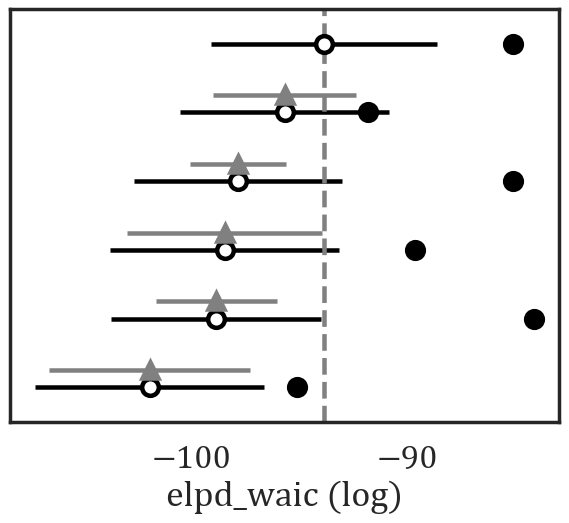

In [ ]:
alc_perf_df, comp_fig, comp_ax = performance_comp_redux(alc_sm_model_dict, alc_bmb_model_dict, figsize=(45*mm, 34*mm), bambi_flag=True)

Demo: r=0.592, p=0.000
Comp: r=0.555, p=0.000
Magnos: r=0.385, p=0.001
Democomp: r=0.592, p=0.000
Demomagnos: r=0.473, p=0.000
All: r=0.626, p=0.000


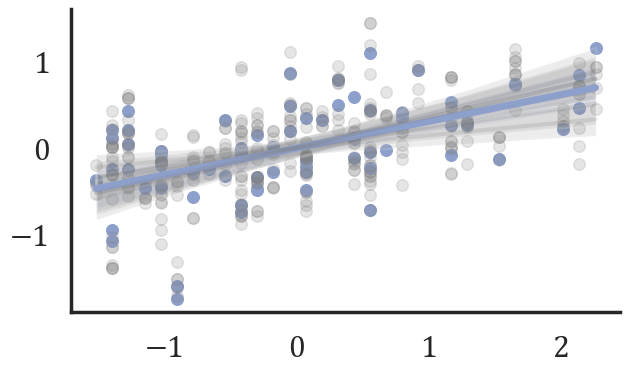

In [ ]:
pred_fig, pred_ax = plot_posterior_predictive_redux(alc_bmb_model_dict, alc_perf_df, alc_reg_params, 'alcohol', figsize=(45*mm, 25*mm))

[Text(0, 0.0, 'Mod'),
 Text(0, 1.3499999999999999, 'EV weight'),
 Text(0, 2.6999999999999997, 'RPE weight'),
 Text(0, 4.049999999999999, 'Craving baseline'),
 Text(0, 5.399999999999999, 'Inv Temperature'),
 Text(0, 6.749999999999998, 'Learning Rate')]

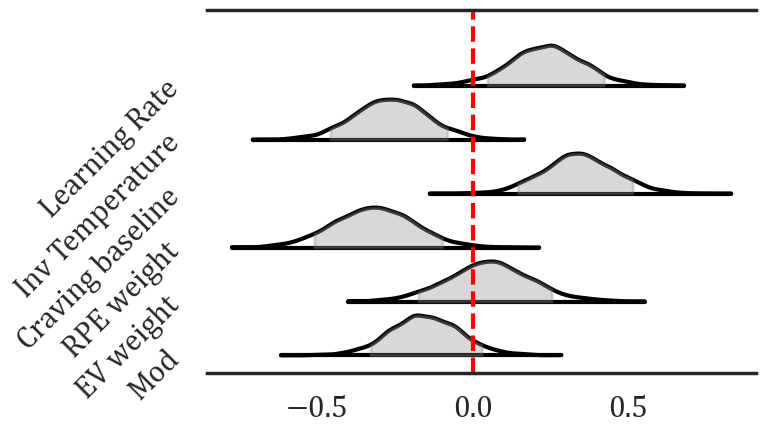

In [ ]:
# Forest plot of alc_bmb_model_dict[alc_perf_df.iloc[0]['Model']]
label_dict = {
    'alpha': 'Learning Rate',
    'beta': 'Inv Temperature',
    'craving_baseline': 'Craving baseline',
    'gamma': 'Gamma',
    'rpe_weight': 'RPE weight',
    'ev_weight': 'EV weight',
    'mod': 'Mod',
    'mean_craving_ratings': 'Mean Craving',
    'std_craving_ratings': 'St.D. Craving',
    'mean_mood_ratings': 'Mean Mood',
    'std_mood_ratings': 'St.D. Mood',
    'money_optimality': 'Money Optimality',
    'other_optimality': 'Addictive Optimality',
    'age': 'Age',
    'income': 'Income',
    'ASSIST_Alcohol_mean': 'ASSIST Alcohol Mean',
}
var_list = [elem for elem in alc_bmb_model_dict[alc_perf_df.iloc[0]['Model']].posterior.data_vars if elem not in ['Intercept', 'ASSIST_Alcohol_sigma', 'ASSIST_Alcohol_mean', "gamma"]]
# mm = 1/25.4*4
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(45*mm, 30*mm))
az.plot_forest(alc_bmb_model_dict[alc_perf_df.iloc[0]['Model']], combined=True, hdi_prob=0.89, kind='ridgeplot', ridgeplot_overlap=1, ridgeplot_truncate=False, ridgeplot_alpha=0.3, colors='gray', var_names=var_list, ax=ax)
ax.axvline(0, color='red', linestyle='--')
ax.set_yticklabels([])
ax.set_yticklabels(reversed([label_dict[elem] for elem in var_list]), rotation=45, ha='right')

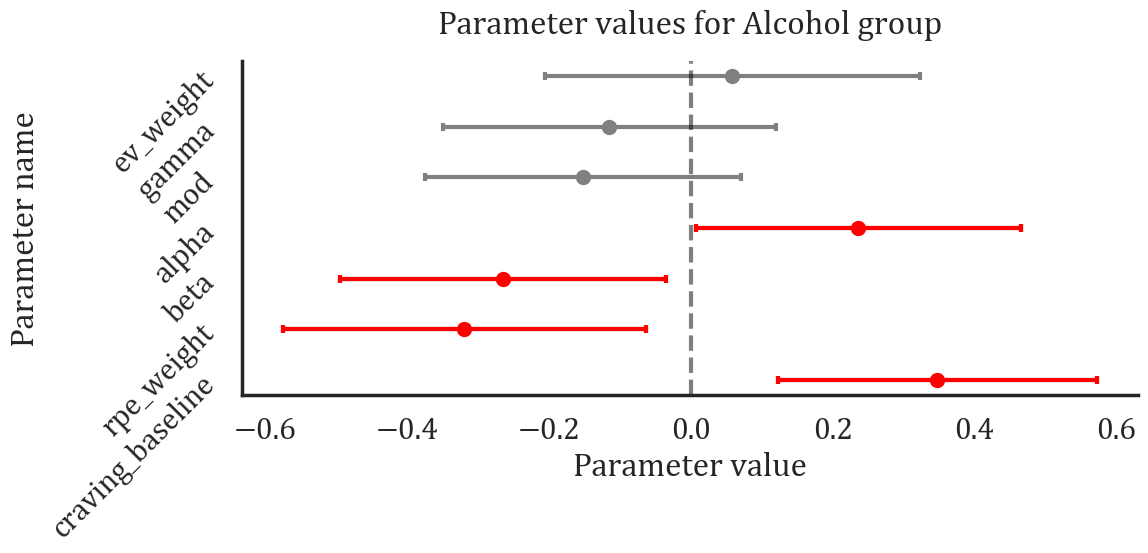

In [23]:
alc_glm_params_df = generate_param_estimates_df(alc_sm_model_dict[alc_perf_df.iloc[0]['Model']], 'Alcohol')
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plot_from_df(glm_param_df=alc_glm_params_df, ax=ax, group='Alcohol')
plt.tight_layout()

## Cannabis analysis

In [17]:
cannabis_master_df['Model'] = 'd_lrbias_rw'
cannabis_master_df['money_optimality'] = cannabis_master_df['Money Accuracy']
cannabis_master_df['other_optimality'] = cannabis_master_df['Other Accuracy']

In [27]:
can_sm_model_dict = {}
can_bmb_model_dict = {}
can_scalers = {}
# for typ in ['comp', 'nonmodel', 'combined']:
# for typ in ['comp', 'nonmodel']:
for typ in ['demo', 'comp', 'magnos', 'democomp', 'demomagnos', 'all']:
    can_sm_model_dict, can_bmb_model_dict, can_reg_params, can_model_scaler = run_group_regression(
        mdf=cannabis_master_df,
        model_names=['d_lrbias_rw'],
        group='cannabis',
        dependent_var='ASSIST_Cannabis',
        typ=typ,
        block='other',
        sm_model_dict=can_sm_model_dict,
        bmb_model_dict=can_bmb_model_dict,
        bambi_flag=True,
        sig_threshold=0.15,
        filter_flag=False
    )
    can_scalers[typ] = can_model_scaler

Running regression for demo - cannabis demo_d_lrbias_rw ASSIST_Cannabis...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ASSIST_Cannabis_sigma, Intercept, age, DEMO_sex_Female, DEMO_sex_Male, edu_level, DEMO_race_NonWhite, DEMO_race_White, income]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


Running regression for comp - cannabis comp_d_lrbias_rw ASSIST_Cannabis...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ASSIST_Cannabis_sigma, Intercept, alpha, beta, craving_baseline, gamma, rpe_weight, ev_weight, mod]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


Running regression for magnos - cannabis magnos_d_lrbias_rw ASSIST_Cannabis...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ASSIST_Cannabis_sigma, Intercept, mean_craving_ratings, std_craving_ratings, other_optimality]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Running regression for democomp - cannabis democomp_d_lrbias_rw ASSIST_Cannabis...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ASSIST_Cannabis_sigma, Intercept, alpha, beta, craving_baseline, gamma, rpe_weight, ev_weight, mod, age, DEMO_sex_Female, DEMO_sex_Male, edu_level, DEMO_race_NonWhite, DEMO_race_White, income]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


Running regression for demomagnos - cannabis demomagnos_d_lrbias_rw ASSIST_Cannabis...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ASSIST_Cannabis_sigma, Intercept, mean_craving_ratings, std_craving_ratings, other_optimality, age, DEMO_sex_Female, DEMO_sex_Male, edu_level, DEMO_race_NonWhite, DEMO_race_White, income]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


Running regression for all - cannabis all_d_lrbias_rw ASSIST_Cannabis...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ASSIST_Cannabis_sigma, Intercept, alpha, beta, craving_baseline, gamma, rpe_weight, ev_weight, mod, mean_craving_ratings, std_craving_ratings, other_optimality, age, DEMO_sex_Female, DEMO_sex_Male, edu_level, DEMO_race_NonWhite, DEMO_race_White, income]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.


,Model,R2,R2_adj,AIC,BIC
0,demo_d_lrbias_rw,0.136306,0.061849,184.245792,197.199091
1,magnos_d_lrbias_rw,0.061940,0.015037,185.531885,194.167417
2,demomagnos_d_lrbias_rw,0.183988,0.065296,186.611234,206.041181
3,comp_d_lrbias_rw,0.089675,-0.024115,191.611073,208.882138
4,democomp_d_lrbias_rw,0.216600,0.032270,192.001012,220.066492
5,all_d_lrbias_rw,0.241374,0.004303,195.944384,230.486513


,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
demo_d_lrbias_rw,0,-94.214885,7.825115,0.000000,4.998671e-01,6.741648,0.000000,True,log
magnos_d_lrbias_rw,1,-94.294644,5.414969,0.079759,5.001329e-01,7.119371,3.268551,True,log
demomagnos_d_lrbias_rw,2,-95.509003,9.995362,1.294118,3.036834e-15,7.209693,1.845796,True,log
comp_d_lrbias_rw,3,-98.879561,10.530213,4.664675,0.000000e+00,7.153720,3.415073,True,log
democomp_d_lrbias_rw,4,-99.348688,14.157979,5.133802,4.292899e-15,7.596631,2.623159,True,log
all_d_lrbias_rw,5,-101.521920,15.997726,7.307034,0.000000e+00,7.512429,2.699726,True,log


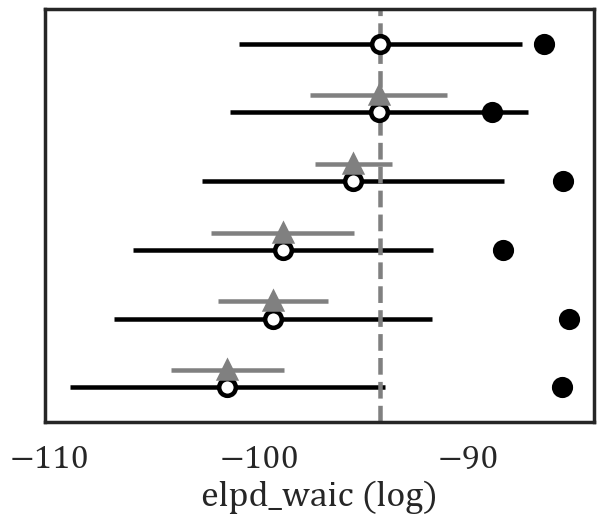

In [ ]:
can_perf_df, comp_fig, comp_ax = performance_comp_redux(can_sm_model_dict, can_bmb_model_dict, figsize=(45*mm, 34*mm), bambi_flag=True)

Demo: r=0.373, p=0.002
Comp: r=0.288, p=0.021
Magnos: r=0.241, p=0.055
Democomp: r=0.471, p=0.000
Demomagnos: r=0.426, p=0.000


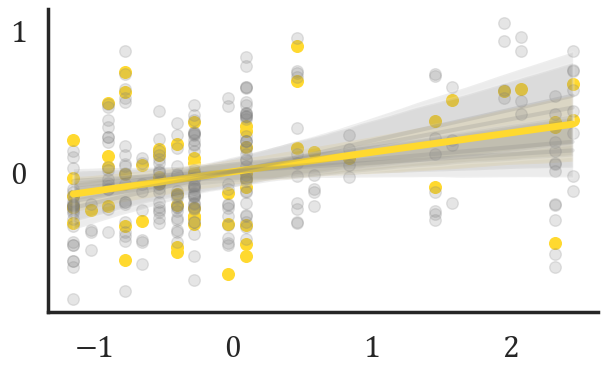

In [ ]:
pred_fig, pred_ax = plot_posterior_predictive_redux(can_bmb_model_dict, can_perf_df, can_reg_params, 'cannabis', figsize=(45*mm, 25*mm))

[Text(0, 0.0, 'Income'),
 Text(0, 1.3499999999999999, 'Education'),
 Text(0, 2.6999999999999997, 'Age')]

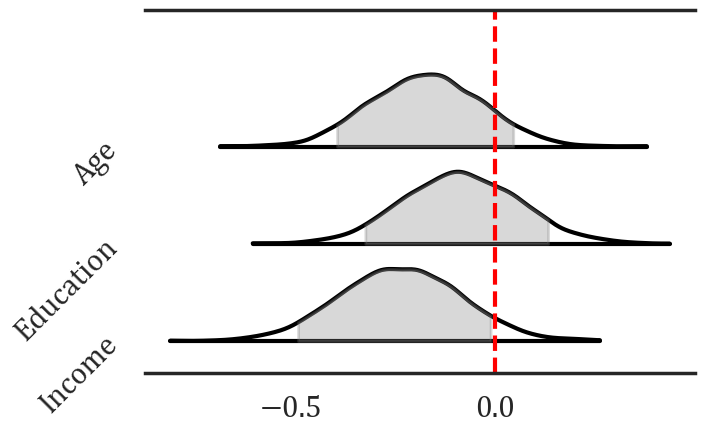

In [ ]:
# Forest plot of can_bmb_model_dict[can_perf_df.iloc[0]['Model']]
label_dict = {
    'alpha': 'Learning Rate',
    'beta': 'Inv Temperature',
    'craving_baseline': 'Craving baseline',
    'gamma': 'Gamm',
    'rpe_weight': 'RPE weight',
    'ev_weight': 'EV weight',
    'mod': 'Mod',
    'mean_craving_ratings': 'Mean Craving',
    'std_craving_ratings': 'St.D. Craving',
    'mean_mood_ratings': 'Mean Mood',
    'std_mood_ratings': 'St.D. Mood',
    'money_optimality': 'Money Optimality',
    'other_optimality': 'Addictive Optimality',
    'age': 'Age',
    'income': 'Income',
    'edu_level': 'Education',
    'DEMO_sex_Female': 'Female',
    'DEMO_sex_Male': 'Male',
    'DEMO_race_NonWhite': 'NonWhite',
    'DEMO_race_White': 'White',
    'ASSIST_Cannabis_mean': 'ASSIST Cannabis Mean',
}
var_list = [elem for elem in can_bmb_model_dict[can_perf_df.iloc[0]['Model']].posterior.data_vars if elem not in ['Intercept', 'ASSIST_Cannabis_sigma', 'ASSIST_Cannabis_mean', 'DEMO_sex_Female', 'DEMO_sex_Male', 'DEMO_race_NonWhite', 'DEMO_race_White']]
# mm = 1/25.4*4
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(45*mm, 30*mm))
az.plot_forest(can_bmb_model_dict[can_perf_df.iloc[0]['Model']], combined=True, hdi_prob=0.89, kind='ridgeplot', ridgeplot_overlap=1, ridgeplot_truncate=False, ridgeplot_alpha=0.3, colors='gray', var_names=var_list, ax=ax)
ax.axvline(0, color='red', linestyle='--')
ax.set_yticklabels([])
# ax.set_xlim(-1.2, 1.2)
# plt.savefig(f'/Users/kulkarnik/LocalProjects/SlotsTasks_simplified_rhoads/outputs/figures/cannabis_reg_forest.svg', format='svg', dpi=300, transparent=True)
plt.savefig(f'{figure_dir}/fig4_cannabis_reg_forest.svg', format='svg', dpi=300, transparent=True)
ax.set_yticklabels(reversed([label_dict[elem] for elem in var_list]), rotation=45, ha='right')

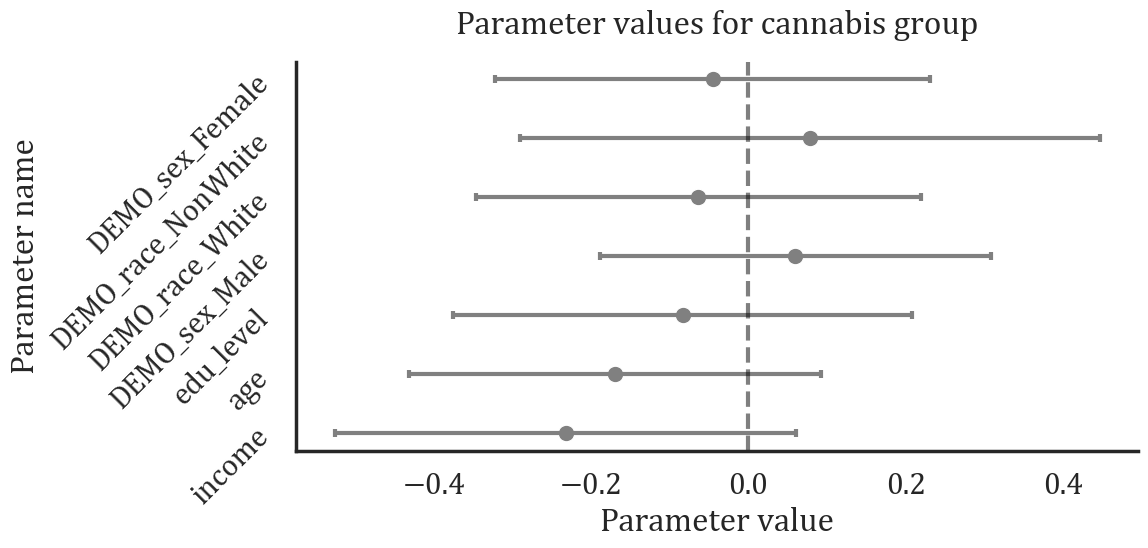

In [50]:
can_glm_params_df = generate_param_estimates_df(can_sm_model_dict[can_perf_df.iloc[0]['Model']], 'Cannabis')
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plot_from_df(glm_param_df=can_glm_params_df, ax=ax, group='cannabis')
plt.tight_layout()